Que-1) Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. 

But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. 
As a friend, you want to help your friend deciding the location. 
NCR include Gurgaon, Noida and New Delhi. 

Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. 

Plot the bar graph between location and number of funding. 

Take city name "Delhi" as "New Delhi". 
Check the case-sensitiveness of cities also.That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". 

For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


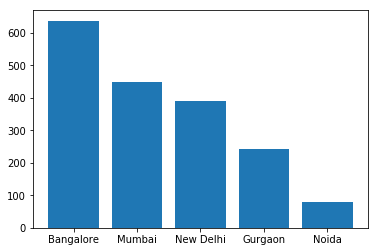

Bangalore is the City which has received funding maximum number of times


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
iris=pd.read_csv("D:\\Dropbox\\startup_funding.csv")
df=iris.copy()

#Replacing Nan value cities with Unknown and Delhi with New Delhi
df.CityLocation.replace(np.nan,"Unknown",inplace=True)
df.CityLocation.replace("Delhi","New Delhi",inplace=True)

#Creating empty list and empty dictionary
l=[]
d={}

#Adding all cities in empty list with lower case
for i in range(df.shape[0]):
    l.append(df.iloc[i,5].lower())

#creating dictionary out of above list
for i in l:
    d[i]=d.get(i,0)+1

# Now if the key has cities separated by "/" then appending the corresponding values
# And resetting the value of that particular key to 0.0
for i in d:
    x=i.split("/")
    if len(x)==2:
        for j in list(d.keys()):
            if x[0].strip()==j.strip():
                d[j]=d[j]+d[i]
                d[i]=0.0
            elif x[1].strip()==j.strip():
                d[j]=d[j]+d[i]
                d[i]=0.0

#Creating blank X,Y Plots
x=[]
y=[]
reqdCities=['bangalore','new delhi','mumbai','gurgaon','noida']
for i in d:
    if i in reqdCities:
        print(i.title(),end=' ')
        x.append(i.title())
        y.append(d[i])
        print(d[i])

#Plotting the Bar for visualization
pt.bar(x,y)
pt.show()
print("Bangalore is the City which has received funding maximum number of times")



Que2) Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. 

Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. 

Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). 

In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
Saif Partners 43
Indian Angel Network 41


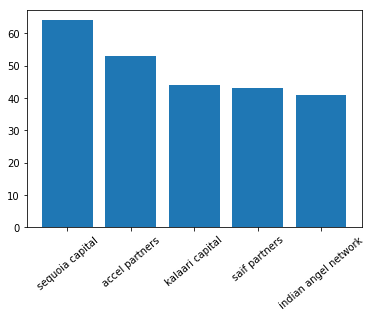

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
iris=pd.read_csv("D:\\Dropbox\\startup_funding.csv")
df=iris.copy()

#Replacing Nan values with blanks for investors column
df.InvestorsName.replace(np.nan,"",inplace=True)

#Creating empty List
l=[]

#For each row of Investor if value is not blank, appending values in list,which are separated by comma
for i in range(df.shape[0]):
    if df.iloc[i,6]!='':
        x=df.iloc[i,6].split(",")
        for i in x:
            l.append(i.strip().lower())


#Initializing an empty dictionary
d={}
#Creating dictionary out of Investor list
for i in l:
    d[i]=d.get(i,0)+1

#Sorting dictionary on values , keeping a check on undisclosed investors
#Storing values in list and reverse sorting the list for top 5 values
l=[]
for i in d:
    if 'undisclosed investor' in i.lower():
        pass
    elif 'undisclosed investors' in i.lower():
        pass
    else:
        l.append(d[i])
l.sort(reverse=True)
l=l[0:5]

#Getting corresponding keys for values in list and plotting a Bar Graph
x=[]
y=[]
for i in range(len(l)):
    for j in d:
        if d[j]==l[i]:
            print(j.title(),end=' ')
            x.append(j)
            print(d[j])
            y.append(d[j])
pt.bar(x,y)
pt.xticks(rotation=40)
pt.show()

Que3) After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. 

So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups.This list will be more helpful than your previous list in finding the investment for your friend startup.

Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. 

There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


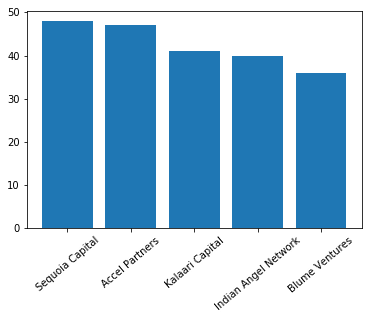

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
iris=pd.read_csv("D:\\Dropbox\\startup_funding.csv")
df=iris.copy()

#Replacing Nan values with Not Available for investors and Startup column
df.InvestorsName.replace(np.nan,"Not Available",inplace=True)
df.StartupName.replace(np.nan,"Not Available",inplace=True)

#Correcting Important startups
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

#Step1
#Creating a dictionary with Key as StartupName and Value as Investor Name
d={}
for i in range(df.shape[0]):
    if df.iloc[i,2]!='Not Available':
        key=df.iloc[i,2]
        value=df.iloc[i,6]
        if key in d:
            d[key]=d[key]+","+value
        else:
            d[key]=value
    
#As of now dictionary has startup-wise Investor Names including duplicate Investor Names as well

#Step2
#Stripping Blank spaces from Values
#Making List of all the values ie Investor Names with Keys as StartUpNames, 
# ie Startup1:[InvestorNames]
# Startup2:[InvestorNames] and so on
#Duplicate Values are still present
for i in d:
    l=d[i].split(",")
    x=[]
    for j in l:   
        j=j.strip()
        x.append(j)
    d[i]=x

#Removing duplicates from all the values ie Investor Names with keys as StartupNames
for i in d:
    d[i]=list(set(d[i]))


#Finally making one list out of all the values(ie Investor Names) and running value counts over it for top 5
l=[]
for i in d:
    for j in d[i]:
        if j!='':
            l.append(j)

#Removing Undisclosed Investors
x=[]
for i in l:
    if 'undisclosed investors' in i.lower():
        pass
    elif 'undisclosed investor' in i.lower():
        pass
    else:
        x.append(i)

#Setting up the data frame and finding value counts and plotting the Bar Graph 
#New Data Frame with x,y plots
df1 = pd.DataFrame(x, columns= ['Investors'])
counts=df1.Investors.value_counts()
keys=counts.keys().tolist()
values=counts.tolist()

#X,Y Plots
a=[]
b=[]
for i in range(5):
    print(keys[i],end=' ')
    a.append(keys[i])
    print(values[i])
    b.append(values[i])

#Plotting the bar graph
pt.bar(a,b)
pt.xticks(rotation=40)
pt.show()

Que4) Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. 

So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. 
This new information will be helpful in finding the right investor. 

Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. 

Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. 

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 

Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 25
Anupam Mittal 16
LetsVenture 16
Group of Angel Investors 15


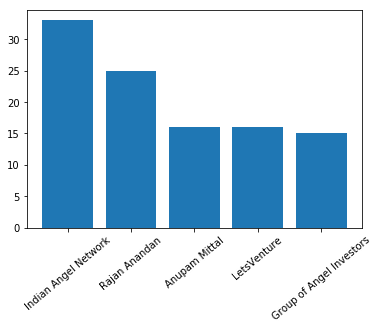

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
iris=pd.read_csv("D:\\Dropbox\\startup_funding.csv")
df=iris.copy()

#Correcting Important startups
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
df.StartupName.replace(np.nan,"Not Available",inplace=True)

#Correcting InvestmentType
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)
df.InvestmentType.replace(np.nan,"Unknown",inplace=True)

#Correcting Investors Name
df.InvestorsName.replace(np.nan,"Not Available",inplace=True)

#Creating Dictionaries with Keys as "Crowd Funding","Seed Funding"
#and values as Investors name
d={}
for i in range(df.shape[0]):
    if df.iloc[i,7]!='Unknown' and df.iloc[i,7]!='Private Equity' and df.iloc[i,7]!='Debt Funding':
        key=df.iloc[i,7]
        value=df.iloc[i,6]
        if key in d:
            d[key]=d[key]+","+value
        else:
            d[key]=value

#Storing all values ie Investor names in a list
l=[]
for i in d:
    x=d[i].split(",")
    for i in x:
        if i!='':
            l.append(i.strip())


#Removing Undisclosed Investors
x=[]
for i in l:
    if 'undisclosed investors' in i.lower():
        pass
    elif 'undisclosed investor' in i.lower():
        pass
    else:
        x.append(i)

#Setting up the data frame and finding value counts and plotting the Bar Graph 
#New Data Frame with x,y plots
df1 = pd.DataFrame(x, columns= ['Investors'])
counts=df1.Investors.value_counts()
keys=counts.keys().tolist()
values=counts.tolist()

#X,Y Plots
a=[]
b=[]
for i in range(5):
    print(keys[i],end=' ')
    a.append(keys[i])
    print(values[i])
    b.append(values[i])

#Plotting the bar graph
pt.bar(a,b)
pt.xticks(rotation=40)
pt.show()

Que5) Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. 

Now your friend wants to expand his startup and he is looking for new investors for his startup. 
Now you again come as a saviour to help your friend and want to create a list of probable new investors. 

Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity.

Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. 

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 59
Accel Partners 47
Kalaari Capital 38
Saif Partners 37
Blume Ventures 30


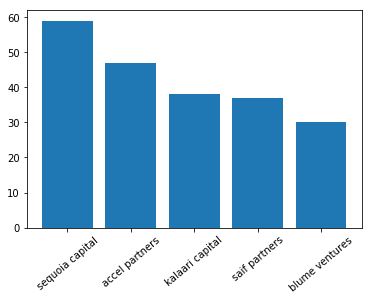

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
iris=pd.read_csv("D:\\Dropbox\\startup_funding.csv")
df=iris.copy()

#Correcting Important startups
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
df.StartupName.replace(np.nan,"Not Available",inplace=True)

#Correcting InvestmentType
df.InvestmentType.replace("PrivateEquity","Private Equity",inplace=True)
df.InvestmentType.replace("SeedFunding","Seed Funding",inplace=True)
df.InvestmentType.replace("Crowd funding","Crowd Funding",inplace=True)
df.InvestmentType.replace(np.nan,"Unknown",inplace=True)

#Correcting Investors Name
df.InvestorsName.replace(np.nan,"Not Available",inplace=True)


#Creating Dictionaries with Keys as "Private Equity"
#and values as Investors name
d={}
for i in range(df.shape[0]):
    if df.iloc[i,7]=='Private Equity':
        key=df.iloc[i,7]
        value=df.iloc[i,6]
        if key in d:
            d[key]=d[key]+","+value
        else:
            d[key]=value

#Storing all values ie Investor names in list
l=[]
for i in d:
    x=d[i].split(",")
    for i in x:
        if i!='':
            l.append(i.strip().lower())

#Removing Undisclosed Investors
x=[]
for i in l:
    if 'undisclosed investors' in i.lower():
        pass
    elif 'undisclosed investor' in i.lower():
        pass
    else:
        x.append(i)

#Setting up the data frame and finding value counts and plotting the Bar Graph 
#New Data Frame with x,y plots
df1 = pd.DataFrame(x, columns= ['Investors'])
counts=df1.Investors.value_counts()
keys=counts.keys().tolist()
values=counts.tolist()

#X,Y Plots
a=[]
b=[]
for i in range(5):
    print(keys[i].title(),end=' ')
    a.append(keys[i])
    print(values[i])
    b.append(values[i])

#Plotting the bar graph
pt.bar(a,b)
pt.xticks(rotation=40)
pt.show()